# Hackaton

## 1 - Import des packages nécessaires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.datasets import load_iris

from random import randrange

## 2 - Import le CSV "test" et convertir le df en tableau numpy

In [2]:
df = pd.read_csv("../datasets/test.csv").dropna()
X = df[["CODE POSTAL", "TOTAL "]].to_numpy()

## 3 - Effectuer et une prédiction de chaque kmeans sans étiquette

In [3]:
kmeans = KMeans(n_clusters=4)
prediction = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(X[:,1], X[:,0], c=prediction)
plt.scatter(centroids[:,1], centroids[:,0], c="r")
plt.show()

[[   65007.03703704  2104918.22222222]
 [   82648.66666667 11453916.33333333]
 [   56172.78846154   885398.73076923]
 [   81948.28571429  5722982.28571429]]


## 4 - Avec toutes les vagues de ministère ???

In [4]:
df = pd.read_csv("../datasets/conso_annuelle_lot1.csv").dropna()
X = df[["CODE POSTAL", "TOTAL "]].to_numpy()

## 5 - Testing with Kmeans

In [5]:
kmeans = KMeans(n_clusters=4, init='random',
               n_init=50, max_iter=500)
prediction = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,1], X[:,0], c=prediction)
plt.scatter(centroids[:,1], centroids[:,0], c="r")
plt.show()

## 6 - Testing with AgglomerativeClustering 

[[3.14000000e+04 3.96970730e+07]
 [6.08218721e+04 1.12162507e+06]
 [7.04796000e+04 4.06845498e+06]
 [7.76986000e+04 9.84844500e+06]]


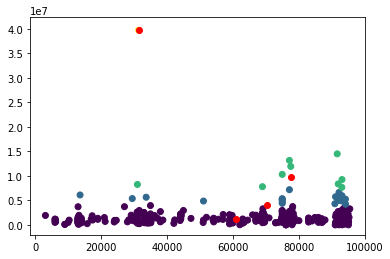

In [6]:
cha = AgglomerativeClustering(n_clusters=4)
prediction = cha.fit_predict(X)
print(centroids)
plt.scatter(X[:,0], X[:,1], c=prediction)
plt.scatter(centroids[:,0], centroids[:,1], c="r")
plt.show()

## 7 - Test de la normalisation des données entre le Scaler Robust (prends en compte le min et max) et le Scaler MinMax (contraire)

/Users/clara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Users/clara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


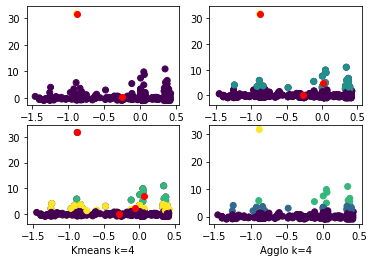

In [7]:
X = df[["CODE POSTAL", "TOTAL "]]
mms = RobustScaler()
X = pd.DataFrame(mms.fit_transform(X), columns=["CODE POSTAL", "TOTAL "])

for k in range(2, 5):
    km = KMeans(n_clusters=k)
    ac = AgglomerativeClustering(n_clusters=k)
    ykm, yac = km.fit_predict(X), ac.fit_predict(X)
    plt.subplot(2, 2, k-1)
    plt.scatter(X["CODE POSTAL"], X["TOTAL "], c=ykm)
    cc = np.transpose(km.cluster_centers_)
    plt.scatter(cc[0], cc[1], c='r')
    plt.xlabel("Kmeans k={0}".format(k))
    plt.subplot(2, 2, k)
    plt.scatter(X["CODE POSTAL"], X["TOTAL "], c=yac)
    plt.xlabel("Agglo k={0}".format(k))
plt.show()

/Users/clara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/Users/clara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


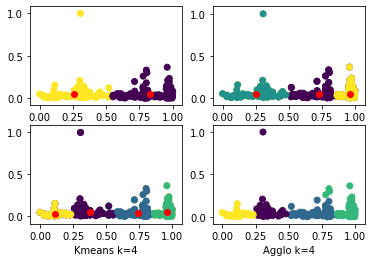

In [8]:
X = df[["CODE POSTAL", "TOTAL "]]
mms = MinMaxScaler()
# Trying to scale with [0,1] value because of the disparity between consommation
X = pd.DataFrame(mms.fit_transform(X), columns=["CODE POSTAL", "TOTAL "])

for k in range(2, 5):
    km = KMeans(n_clusters=k)
    ac = AgglomerativeClustering(n_clusters=k)
    ykm, yac = km.fit_predict(X), ac.fit_predict(X)
    plt.subplot(2, 2, k-1)
    plt.scatter(X["CODE POSTAL"], X["TOTAL "], c=ykm)
    cc = np.transpose(km.cluster_centers_)
    plt.scatter(cc[0], cc[1], c='r')
    plt.xlabel("Kmeans k={0}".format(k))
    plt.subplot(2, 2, k)
    plt.scatter(X["CODE POSTAL"], X["TOTAL "], c=yac)
    plt.xlabel("Agglo k={0}".format(k))
plt.show()

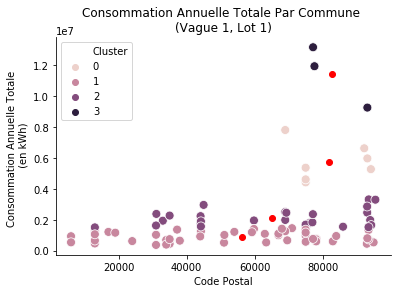

In [54]:
df1 = pd.read_csv("../datasets/vague1.csv").dropna()
X_1 = df1[["CODE POSTAL", "TOTAL "]].to_numpy()

kmeans = KMeans(n_clusters=4, init='random',
               n_init=50, max_iter=500)
prediction = kmeans.fit_predict(X_1)
centroids = kmeans.cluster_centers_
df1['Cluster'] = kmeans.labels_.astype(int)

ax = sns.scatterplot(x="CODE POSTAL", y="TOTAL ", hue="Cluster", 
                data=df1, s=80);
plt.scatter(centroids[:,0], centroids[:,1], c="r")

# Customize the axes and title
ax.set_title("Consommation Annuelle Totale Par Commune \n(Vague 1, Lot 1)")
ax.set_xlabel("Code Postal")
ax.set_ylabel("Consommation Annuelle Totale \n (en kWh)")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

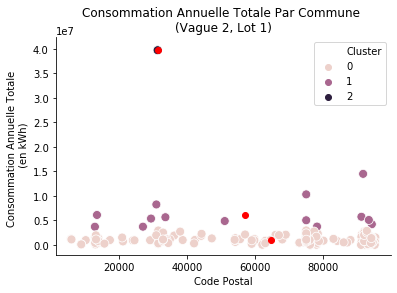

In [53]:
df2 = pd.read_csv("../datasets/vague2.csv").dropna()
X_2 = df2[["CODE POSTAL", "TOTAL "]].to_numpy()
kmeans = KMeans(n_clusters=3, init='random',
               n_init=50, max_iter=500)
prediction = kmeans.fit_predict(X_2)
centroids = kmeans.cluster_centers_
df2['Cluster'] = kmeans.labels_.astype(int)

ax = sns.scatterplot(x="CODE POSTAL", y="TOTAL ", hue="Cluster", 
                data=df2, s = 80);
plt.scatter(centroids[:,0], centroids[:,1], c="r")

# Customize the axes and title
ax.set_title("Consommation Annuelle Totale Par Commune \n(Vague 2, Lot 1)")
ax.set_xlabel("Code Postal")
ax.set_ylabel("Consommation Annuelle Totale \n (en kWh)")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [55]:
df3 = pd.read_csv("../datasets/vague3.csv").dropna()
X_3 = df3[["CODE POSTAL", "TOTAL "]].to_numpy()
kmeans = KMeans(n_clusters=4, init='random',
               n_init=50, max_iter=500)
prediction = kmeans.fit_predict(X_3)
centroids = kmeans.cluster_centers_
df3['Cluster'] = kmeans.labels_.astype(int)

ax = sns.scatterplot(x="CODE POSTAL", y="TOTAL ", hue="Cluster", 
                data=df3, s=80);
plt.scatter(centroids[:,0], centroids[:,1], c="r")

# Customize the axes and title
ax.set_title("Consommation Annuelle Totale Par Commune \n(Vague 3, Lot 1)")
ax.set_xlabel("Code Postal")
ax.set_ylabel("Consommation Annuelle Totale \n (en kWh)")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)